In [41]:
from collections import defaultdict

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from constants import DATA_PATH, LABEL_NAME

In [3]:
data = pd.read_csv(DATA_PATH)
features = [c for c in data if c != LABEL_NAME]

features_df = data[features]
label_df = data[LABEL_NAME]

### Features EDA

In [4]:
n_uniques = defaultdict(list)  # need to understand our features a bit
for feature in features_df:
    n_uniques[features_df[feature].nunique()].append(feature)

n_uniques.keys()

dict_keys([500, 199, 90000, 2])

Describe 500 feature

In [5]:
features_df[n_uniques[500]].info()  # numerical as well as 90000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       90000 non-null  int64
 1   1       90000 non-null  int64
 2   2       90000 non-null  int64
 3   3       90000 non-null  int64
 4   4       90000 non-null  int64
 5   5       90000 non-null  int64
 6   9       90000 non-null  int64
 7   10      90000 non-null  int64
 8   11      90000 non-null  int64
 9   12      90000 non-null  int64
dtypes: int64(10)
memory usage: 6.9 MB


<Axes: >

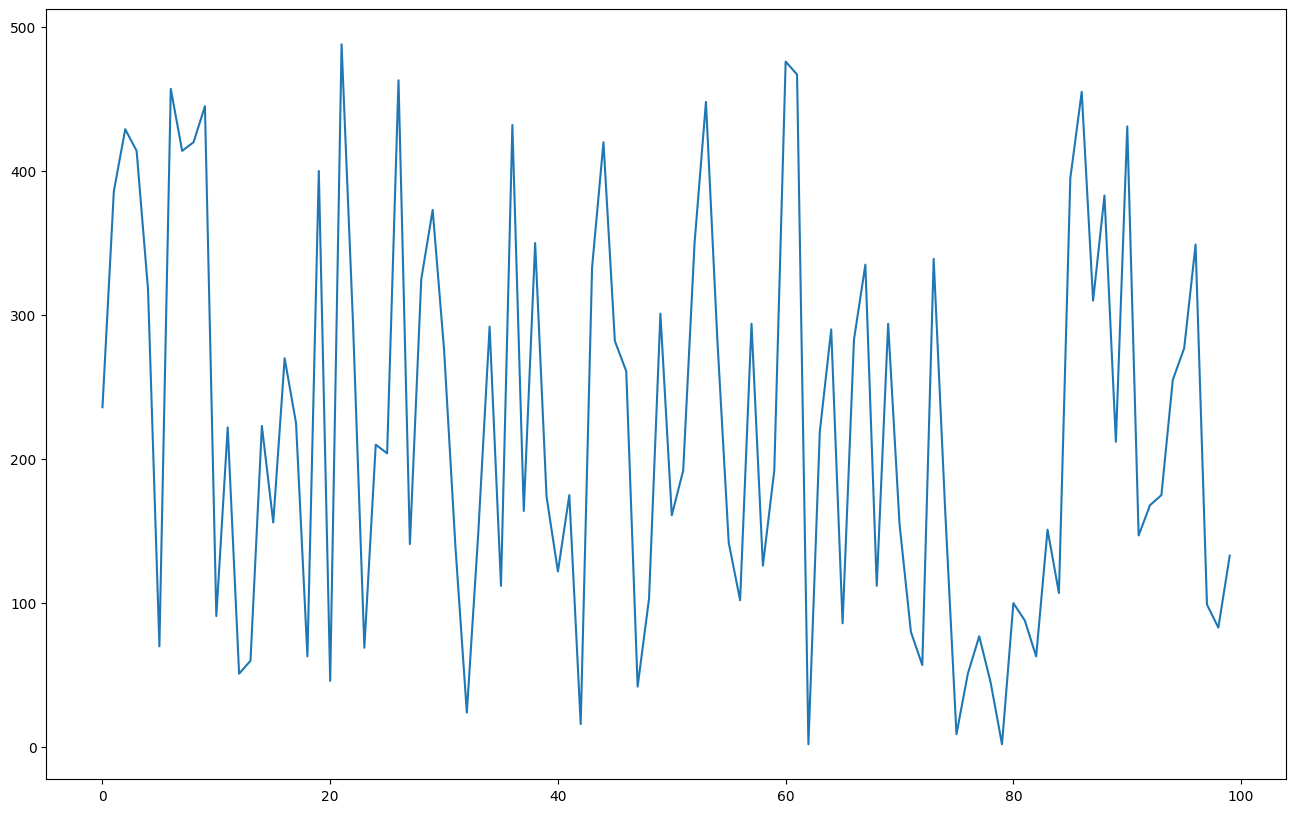

In [11]:
features_df[n_uniques[500][0]][:100].plot(figsize=(16, 10))

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
       [<Axes: title={'center': '2'}>, <Axes: title={'center': '3'}>]],
      dtype=object)

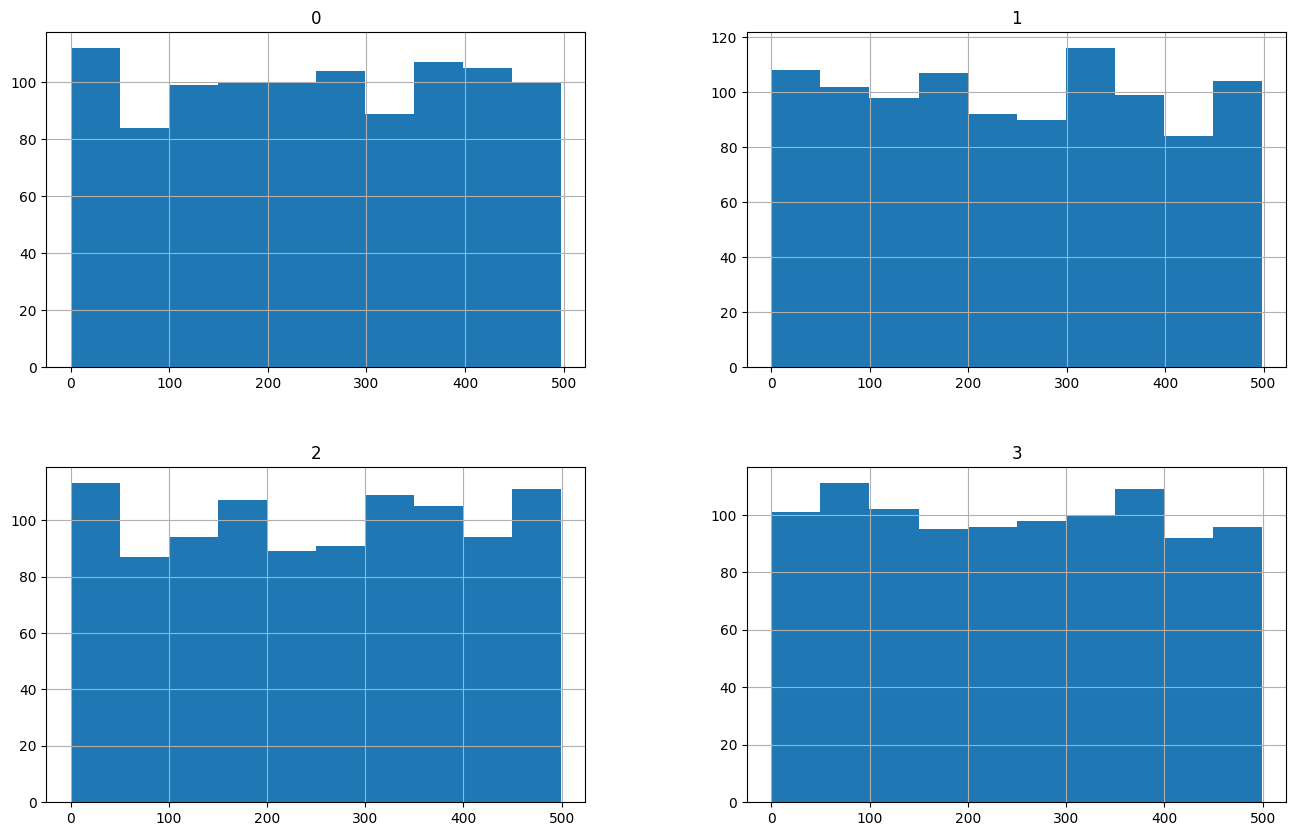

In [19]:
features_df[n_uniques[500][:4]][:1000].hist(figsize=(16, 10))

Describe 199 feature

In [12]:
features_df[n_uniques[199]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   6       90000 non-null  float64
dtypes: float64(1)
memory usage: 703.3 KB


array([[<Axes: title={'center': '6'}>]], dtype=object)

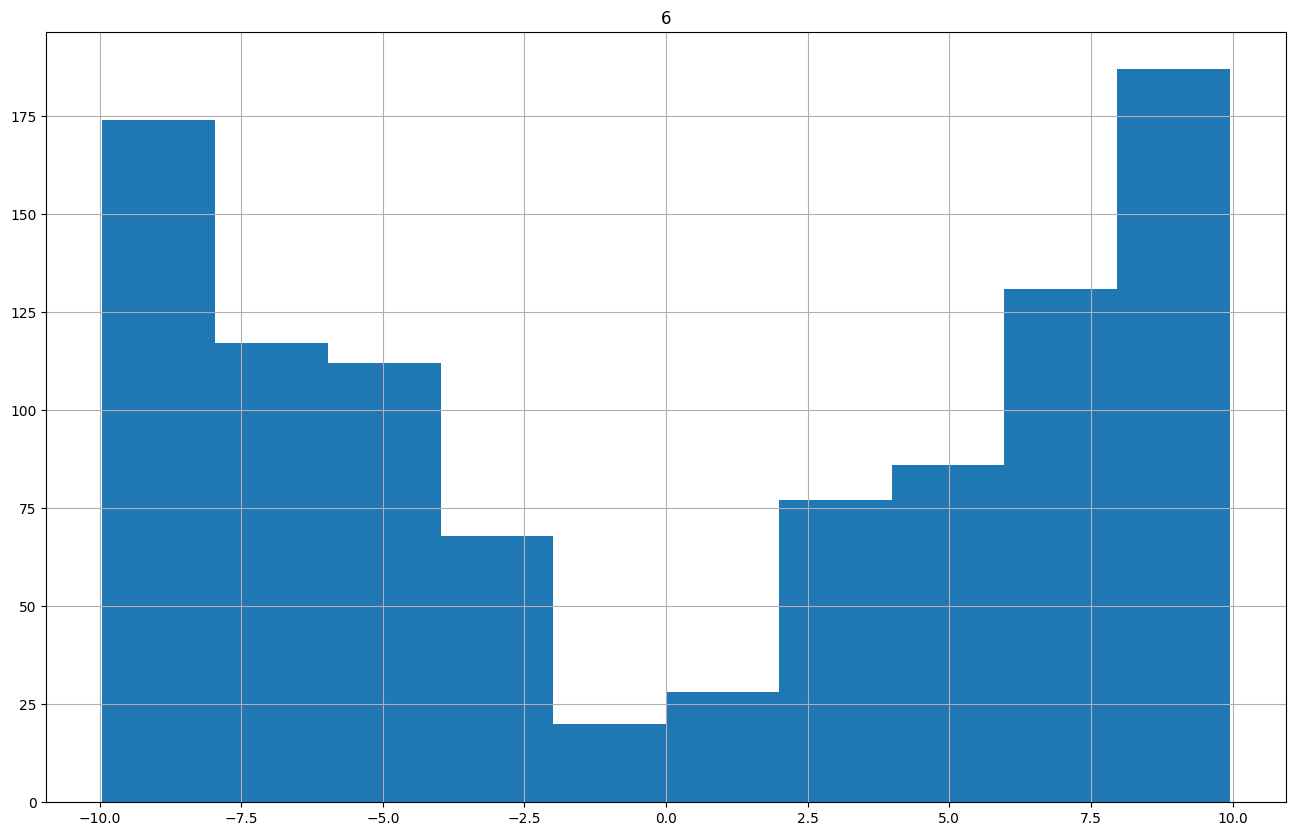

In [20]:
features_df[n_uniques[199]][:1000].hist(figsize=(16, 10))  # bimodal distribution 

<Axes: >

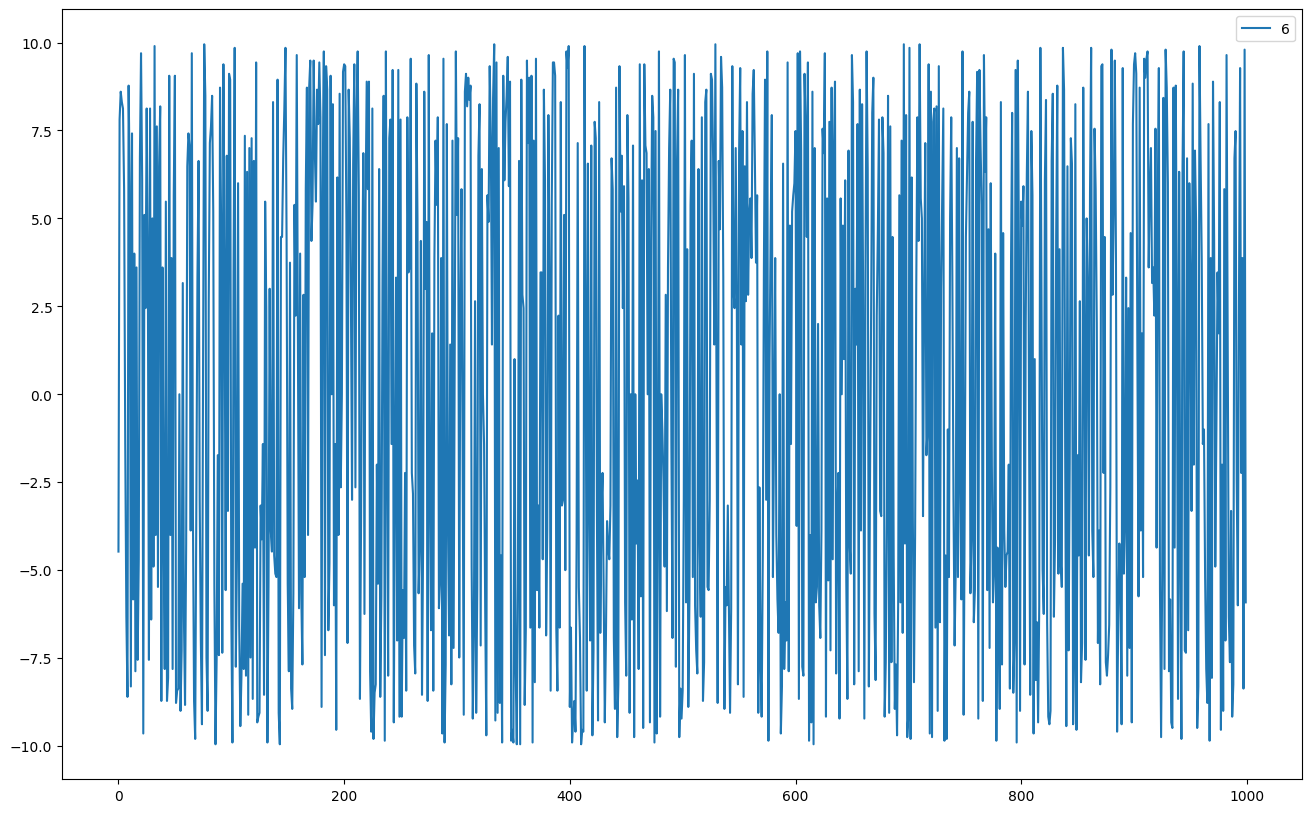

In [36]:
features_df[n_uniques[199]][:1000].plot(figsize=(16, 10))

Now categorical feature understanding

In [27]:
features_df[n_uniques[2]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   8       90000 non-null  int64
dtypes: int64(1)
memory usage: 703.3 KB


<Axes: xlabel='8'>

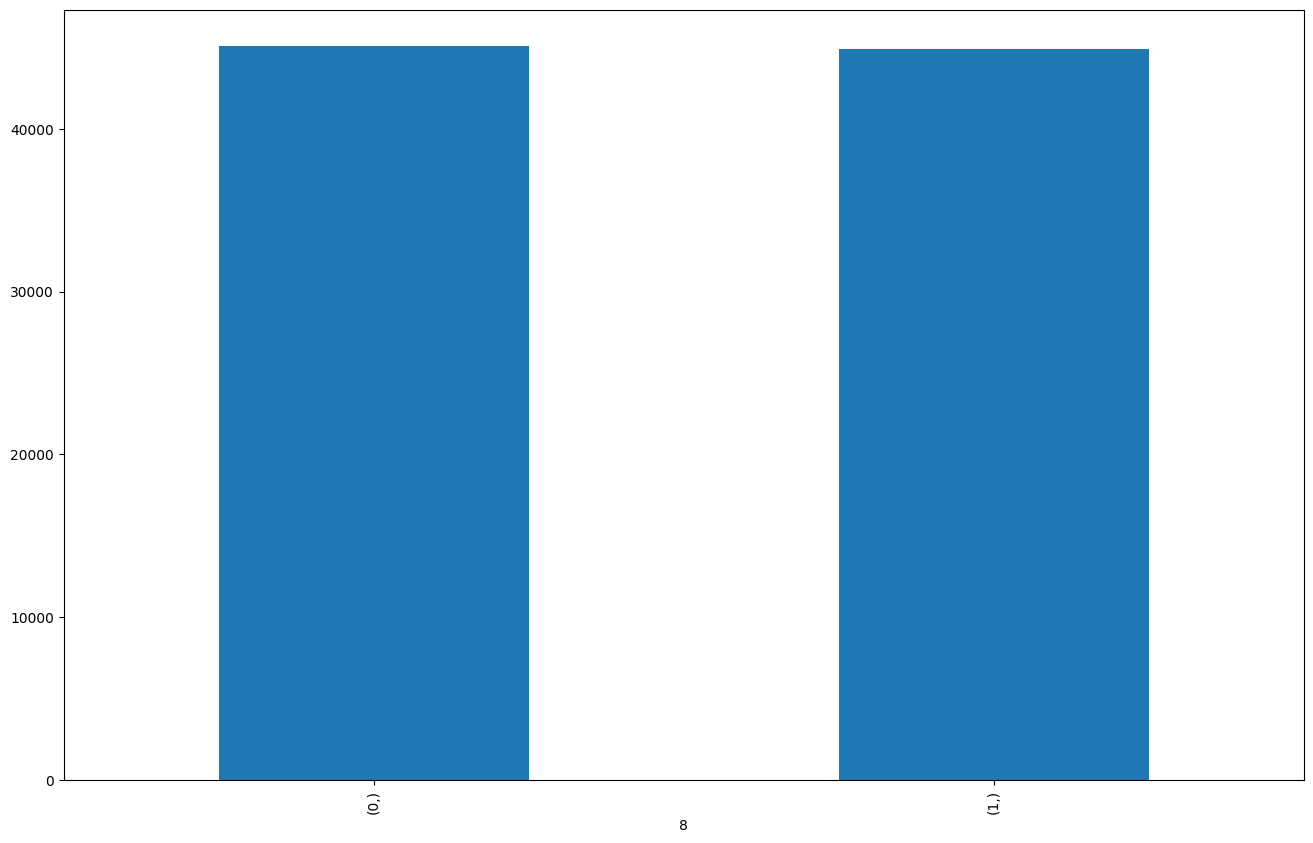

In [26]:
features_df[n_uniques[2]].value_counts().plot.bar(figsize=(16, 10)) # all good with this one

Numerical feature heatmap

In [33]:
features_df[n_uniques[90000]].corr().style.background_gradient(cmap='coolwarm') # all features uncorrelated, good

,7,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52
7,1.000000,-0.000094,0.006217,-0.006649,0.000764,0.001452,0.001051,0.004264,0.007655,0.001975,0.001593,-0.001765,0.001357,-0.000769,-0.005641,-0.000741,0.006173,-0.001929,0.001318,0.002016,-0.001138,0.004111,0.002402,-0.000413,0.004828,-0.000499,-0.000003,-0.007122,0.001881,0.002200,0.002442,-0.005556,-0.005103,0.002937,0.003277,-0.001273,-0.000669,0.001930,0.001085,0.008363,0.001724
13,-0.000094,1.000000,-0.000914,-0.002202,0.003226,0.000340,0.003041,0.001566,-0.000247,0.002721,-0.002100,-0.002032,-0.002279,0.000877,0.003096,0.002723,0.000601,-0.001429,0.005695,0.001838,-0.001070,0.003468,0.001449,0.003886,-0.003720,0.000736,-0.001160,0.005422,-0.001405,-0.004712,-0.005241,-0.002643,-0.008637,0.001529,0.002127,0.001348,0.006556,-0.001908,0.003040,0.000086,-0.005052
14,0.006217,-0.000914,1.000000,0.001359,-0.000273,-0.001593,-0.004030,-0.000814,0.002357,0.002365,0.001427,-0.003010,0.004985,0.003441,0.007992,-0.003290,-0.001808,0.002359,0.003689,0.002609,0.001679,-0.000217,0.001153,-0.001226,-0.003332,0.000408,0.001100,-0.001392,-0.002618,-0.000855,-0.002324,-0.004033,-0.002407,-0.003698,0.006155,-0.004567,0.006546,0.000233,0.003481,-0.004148,-0.001981
15,-0.006649,-0.002202,0.001359,1.000000,0.003133,0.004182,-0.000028,-0.000981,0.000205,-0.005699,-0.003122,-0.005753,-0.003288,0.000687,0.001002,-0.000321,-0.001425,-0.002374,0.002416,0.001802,-0.000474,-0.003505,0.004442,0.002602,-0.002452,0.000046,-0.007296,-0.003343,-0.001369,-0.004119,-0.000936,-0.005262,-0.005516,-0.001852,-0.000366,0.002504,-0.001416,-0.003066,0.003332,-0.002730,0.004676
16,0.000764,0.003226,-0.000273,0.003133,1.000000,-0.002468,-0.000340,-0.003684,-0.000315,-0.000013,0.006845,0.003404,-0.000364,0.001324,-0.001665,0.005664,0.001670,-0.002058,0.002737,-0.004895,0.000180,-0.003134,0.001159,-0.002022,0.001369,-0.002961,0.001239,-0.005790,0.000632,-0.002575,-0.000054,-0.004556,0.000567,-0.000440,-0.003665,-0.003022,-0.005081,0.005449,-0.002134,0.000333,-0.001792
17,0.001452,0.000340,-0.001593,0.004182,-0.002468,1.000000,0.003946,-0.003771,0.002676,0.007650,-0.001427,-0.003664,0.003038,0.000846,0.000380,0.000130,0.003961,0.000768,-0.007433,0.002263,-0.007017,-0.003535,-0.005024,0.001919,0.007784,0.001810,0.008472,0.001334,0.002435,-0.005988,0.007165,0.006114,0.000256,-0.003969,-0.001960,-0.000285,0.003584,-0.002894,-0.001033,0.001577,0.003935
18,0.001051,0.003041,-0.004030,-0.000028,-0.000340,0.003946,1.000000,-0.001598,-0.003539,0.000319,-0.004535,-0.003370,-0.002038,0.005746,-0.004372,-0.000483,0.003933,-0.005326,0.004515,0.000872,-0.004064,-0.006853,0.000683,0.000324,-0.001560,0.002091,-0.001444,0.002965,-0.003895,-0.000364,0.000080,-0.001021,-0.002267,0.000260,-0.001119,-0.004576,-0.006360,-0.001054,0.001042,-0.002578,-0.000458
19,0.004264,0.001566,-0.000814,-0.000981,-0.003684,-0.003771,-0.001598,1.000000,-0.001998,-0.000621,0.003399,-0.000080,0.003490,-0.001424,0.002362,0.003429,-0.004038,0.007372,0.001964,0.003967,-0.000584,-0.004440,-0.004260,-0.000385,-0.004759,-0.002540,0.001936,-0.000268,0.000881,-0.000766,-0.005324,-0.000083,0.003201,-0.000607,-0.001551,-0.001309,-0.006078,0.000761,-0.000529,0.005631,0.001556
20,0.007655,-0.000247,0.002357,0.000205,-0.000315,0.002676,-0.003539,-0.001998,1.000000,0.005319,-0.000782,-0.000937,0.000697,0.002257,-0.006616,-0.001784,0.004222,0.003814,0.005283,-0.005250,-0.001040,0.005544,-0.003131,-0.001818,-0.000831,0.004292,-0.000986,-0.000037,-0.005800,0.006307,0.003934,0.000035,0.005013,0.008442,-0.000369,-0.000336,0.001614,-0.006575,-0.003686,-0.004364,0.001683
21,0.001975,0.002721,0.002365,-0.005699,-0.000013,0.007650,0.000319,-0.000621,0.005319,1.000000,0.003491,0.000892,0.000354,0.001590,0.002907,-0.003210,-0.000472,0.002767,-0.001697,-0.001428,-0.002075,-0.000673,0.000149,-0.002420,-0.000248,0.000252,0.005139,-0.005135,0.000168,-0.000959,0.000815,0.001754,0.000799,-0.007267,-0.002189,0.00351

In [ ]:
numerical_keys = [90000, 500]
categorical_key = 2


### Label EDA

In [37]:
label_df.info()

<class 'pandas.core.series.Series'>
RangeIndex: 90000 entries, 0 to 89999
Series name: target
Non-Null Count  Dtype  
--------------  -----  
90000 non-null  float64
dtypes: float64(1)
memory usage: 703.3 KB


In [38]:
label_df.describe()

count    90000.000000
mean        50.033981
std         28.897243
min          0.002634
25%         25.091903
50%         50.030705
75%         75.059454
max         99.999482
Name: target, dtype: float64

<Axes: >

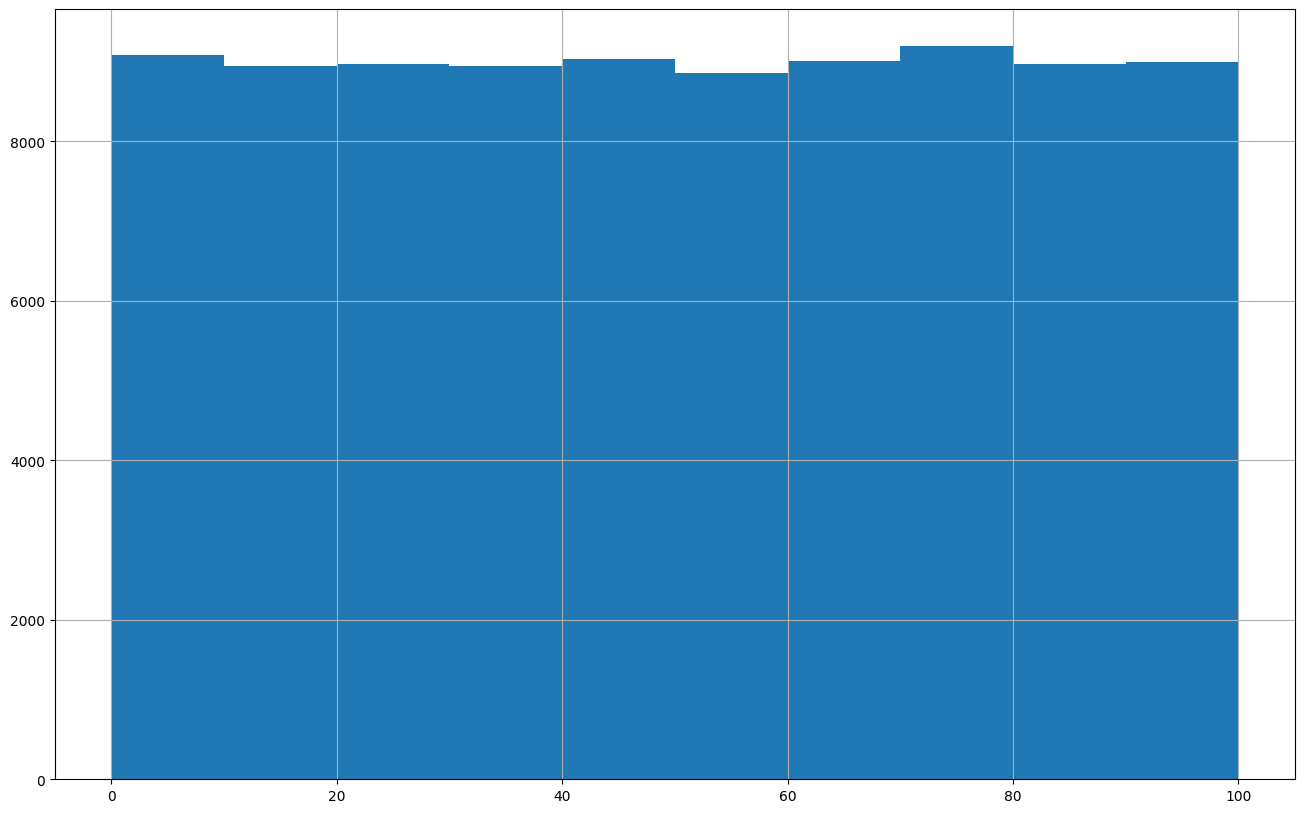

In [40]:
label_df.hist(figsize=(16, 10))  # ok